### Ogólne wprowadzenie

###### UWAGA:
Graf może mieć wiele różnych minimalnych drzew spinających, jeżeli ich sumaryczne wagi są takie same.

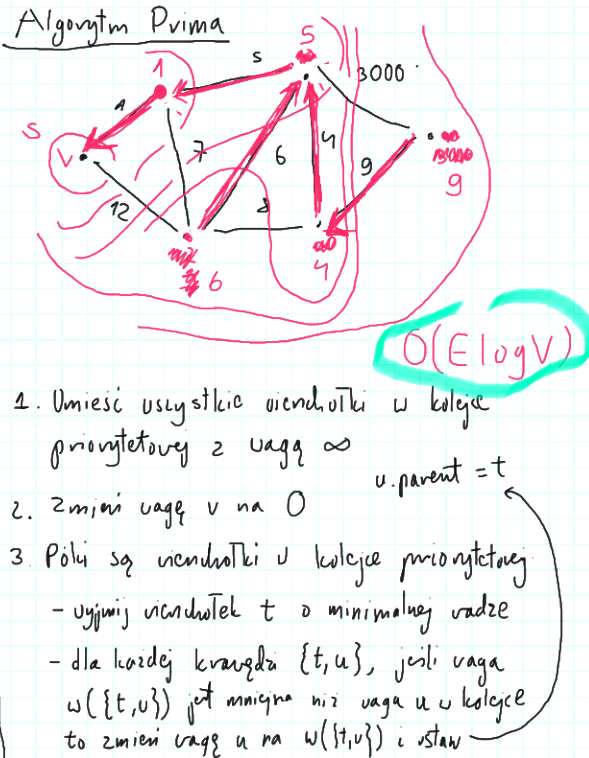

##### Dobry materiał na YouTube:

https://www.youtube.com/watch?v=jsmMtJpPnhU <br>
https://www.youtube.com/watch?v=xq3ABa-px_g

# Dla grafu w postaci list sąsiedztwa

### Implementacja #1
#### (Bez sprawdzania spójności grafu)
##### (Dla reprezentacji grafu w postaci list sąsiedztwa)

#### Uwagi:

Algorytm nie sprawdza, czy graf jest spójny. Zakładamy, że na wejściu otrzymujemy graf: <b><u>nieskierowany</u></b>, <b><u>spójny</u></b> i <b><u>ważony</u></b>.

#### Złożoność:

$ O(E \cdot log(V)) $ - bo w kolejce priorytetowej znajdzie się maksymalnie $ E $ krawędzi, ale $ E \le V^2 $.

##### Kod:

In [1]:
from queue import PriorityQueue


def prims(G: 'graph represented by adjacency lists'):
    n = len(G)
    inf = float('inf')
    parents   = [-1] * n
    weights   = [inf] * n
    processed = [False] * n
    pq = PriorityQueue()
    pq.put((0, 0)) 
    
    while not pq.empty():
        u_weight, u = pq.get()
        # Skip a vertex if it was processed before
        if processed[u]: continue
        # If we remove the vertex from a priority queue this must be a vertex
        # with the lowest weight in a queue so we will mark this vertex as
        # processed because all the future occurrences of this vertex
        # in a priority queue must be skipped
        processed[u] = True
        # Loop over all the u vertex's neighbours and update parents of such
        # vertices which are not processed and their current weight is greater
        # than the u_weight
        for v, e_weight in G[u]:
            if not processed[v] and e_weight < weights[v]:
                parents[v] = u
                weights[v] = e_weight
                pq.put((e_weight, v))

    return parents, weights


def get_MST(G: 'graph represented by adjacency lists') -> 'minimum spanning tree graph':
    parents, weights = prims(G)
    n = len(G)
    G = [[] for _ in range(n)]
    for u in range(n):
        if parents[u] >= 0:
            G[parents[u]].append((u, weights[u]))
            G[u].append((parents[u], weights[u]))
    return G

###### Kilka testów

##### Pomocnicze:

In [2]:
def undirected_weighted_graph_list(E: 'array of edges'):
    # Find a number of vertices
    n = 0
    for e in E:
        n = max(n, e[0], e[1])
    n += 1
    # Create a graph
    G = [[] for _ in range(n)]
    for e in E:
        G[e[0]].append((e[1], e[2]))
        G[e[1]].append((e[0], e[2]))
    return G

##### Testy:

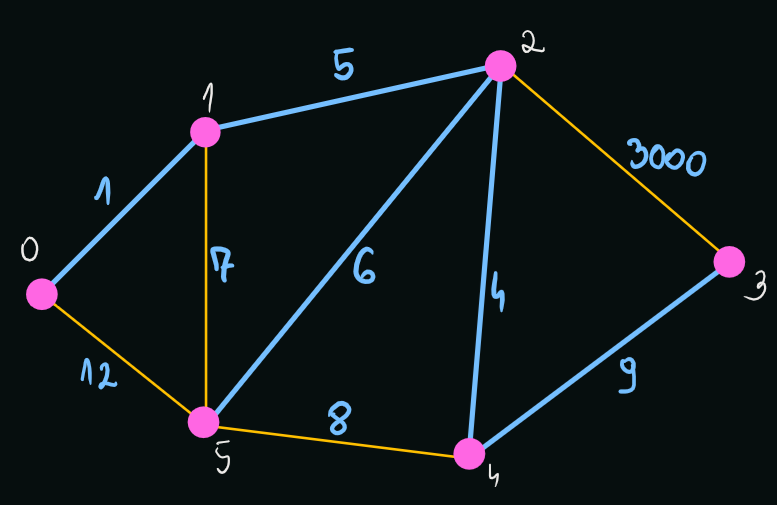

In [3]:
G = undirected_weighted_graph_list([(0, 1, 1), (1, 2, 5), (2, 3, 3000), (0, 5, 12), (1, 5, 7),
                                    (5, 2, 6), (5, 4, 8), (4, 2, 4), (4, 3, 9)])

print(prims(G))
print()
print(*get_MST(G), sep='\n')

([-1, 0, 1, 4, 2, 2], [inf, 1, 5, 9, 4, 6])

[(1, 1)]
[(0, 1), (2, 5)]
[(1, 5), (4, 4), (5, 6)]
[(4, 9)]
[(3, 9), (2, 4)]
[(2, 6)]


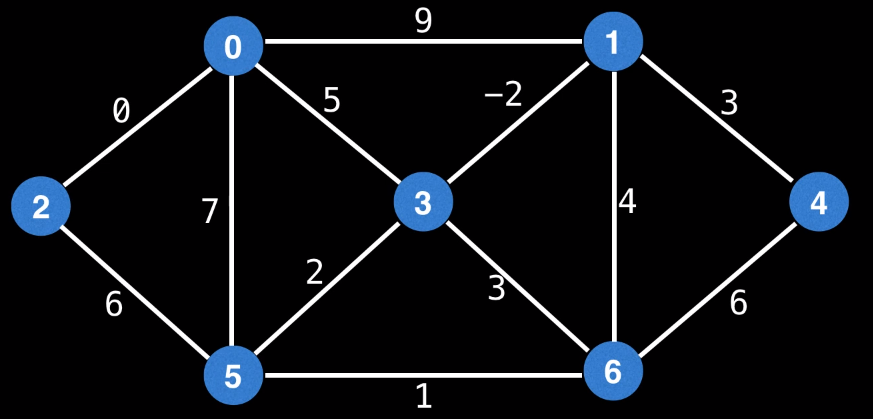
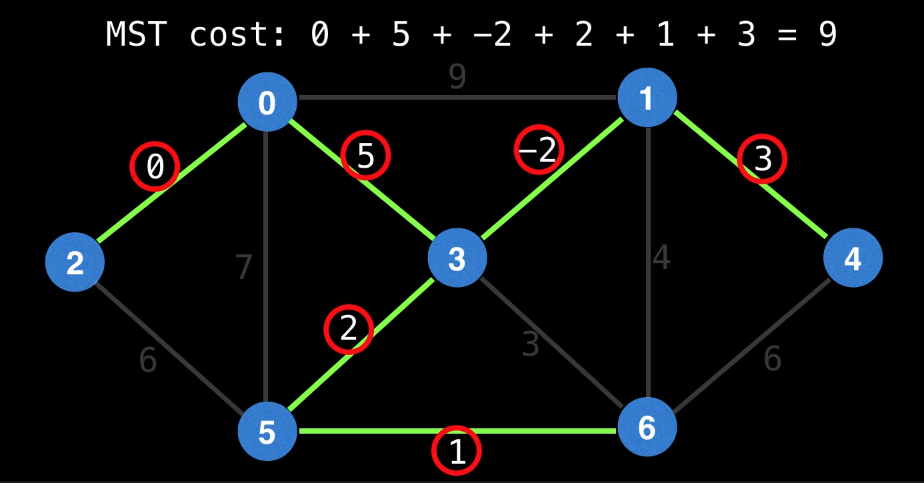

In [4]:
G = undirected_weighted_graph_list([(0, 1, 9), (1, 4, 3), (4, 6, 6), (6, 5, 1), (5, 2, 6), (2, 0, 0),
                                    (0, 5, 7), (0, 3, 5), (3, 5, 2), (3, 1, -2), (3, 6, 3)])

print(prims(G))
print()
print(*get_MST(G), sep='\n')

([-1, 3, 0, 0, 1, 3, 5], [inf, -2, 0, 5, 3, 2, 1])

[(2, 0), (3, 5)]
[(3, -2), (4, 3)]
[(0, 0)]
[(1, -2), (0, 5), (5, 2)]
[(1, 3)]
[(3, 2), (6, 1)]
[(5, 1)]


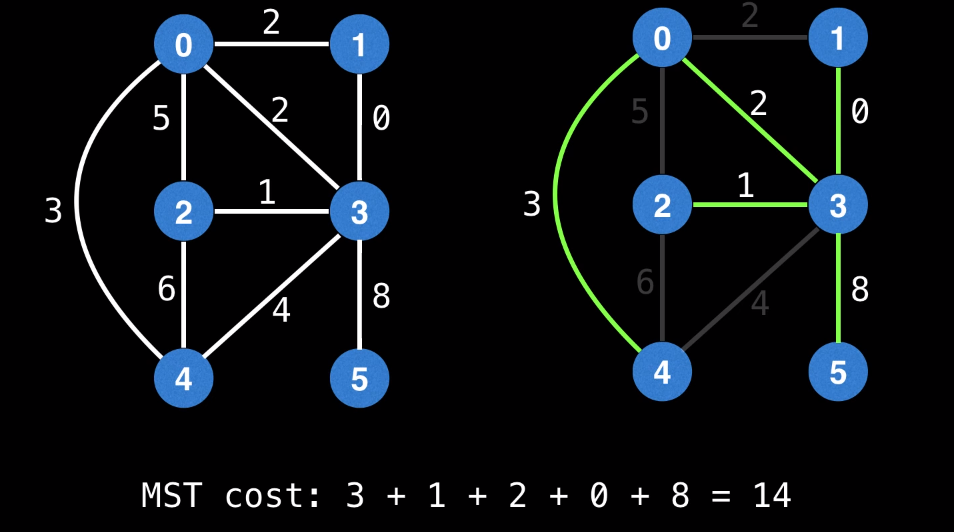

In [5]:
G = undirected_weighted_graph_list([(0, 1, 2), (1, 3, 0), (0, 3, 2), (0, 4, 3), (0, 2, 5), (2, 3, 1),
                                    (2, 4, 6), (4, 3, 4), (3, 5, 8)])

print(prims(G))
print()
print(*get_MST(G), sep='\n')  # Ten przykład pokazuje, że możliwe jest inne rozwiązanie niż na ilustracji

([-1, 0, 3, 1, 0, 3], [inf, 2, 1, 0, 3, 8])

[(1, 2), (4, 3)]
[(0, 2), (3, 0)]
[(3, 1)]
[(2, 1), (1, 0), (5, 8)]
[(0, 3)]
[(3, 8)]


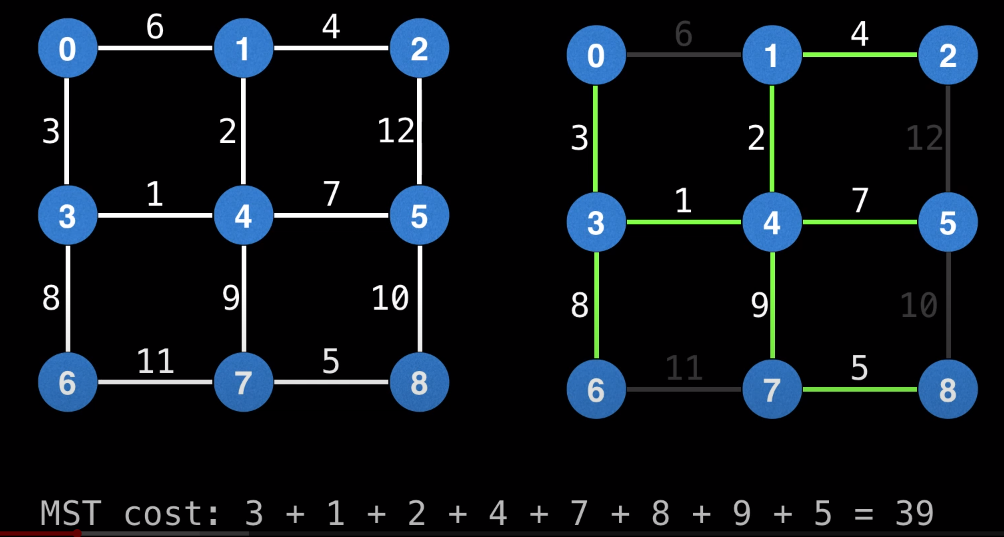

In [6]:
G = undirected_weighted_graph_list([(0, 1, 6), (1, 2, 4), (3, 4, 1), (4, 5, 7), (6, 7, 11), (7, 8, 5),
                                    (0, 3, 3), (3, 6, 8), (1, 4, 2), (4, 7, 9), (2, 5, 12), (5, 8, 10)])

print(prims(G))
print()
print(*get_MST(G), sep='\n')  # Ten przykład pokazuje, że możliwe jest inne rozwiązanie niż na ilustracji

([-1, 4, 1, 0, 3, 4, 3, 4, 7], [inf, 2, 4, 3, 1, 7, 8, 9, 5])

[(3, 3)]
[(4, 2), (2, 4)]
[(1, 4)]
[(0, 3), (4, 1), (6, 8)]
[(1, 2), (3, 1), (5, 7), (7, 9)]
[(4, 7)]
[(3, 8)]
[(4, 9), (8, 5)]
[(7, 5)]


##### Graf bez minimalnego drzewa spinającego
Konieczne jest sprawdzenie, czy graf jest spójny
###### UWAGA: Poniżej uzyskamy błędny wynik bez sprawdzenia spójności grafu
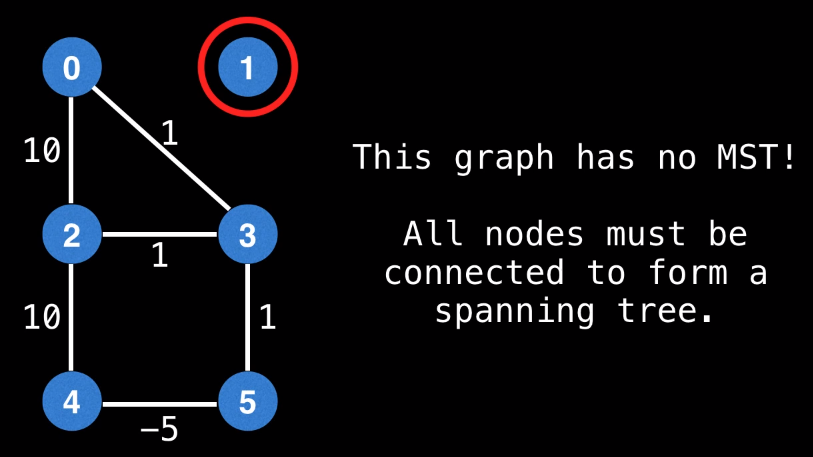

In [7]:
G = undirected_weighted_graph_list([(0, 3, 1), (0, 2, 10), (2, 3, 1), (2, 4, 10), (4, 5, -5), (5, 3, 1)])

print(prims(G))
print()
print(*get_MST(G), sep='\n')

([-1, -1, 3, 0, 5, 3], [inf, inf, 1, 1, -5, 1])

[(3, 1)]
[]
[(3, 1)]
[(2, 1), (0, 1), (5, 1)]
[(5, -5)]
[(4, -5), (3, 1)]


### Implementacja #1.1
#### (Ze sprawdzeniem spójności grafu)
##### (Dla reprezentacji grafu w postaci list sąsiedztwa)

#### Uwagi:

Ten sam algorytm, co powyżej, ale ze sprawdzeniem spójności

#### Złożoność:

$ O(E \cdot log(E)) = O(E \cdot log(V)) $ - bo w kolejce priorytetowej znajdzie się maksymalnie $ E $ krawędzi.

##### Kod:

In [8]:
from queue import PriorityQueue


def is_consistent(G: 'graph represented using adjacency lists'):
    n = len(G)
    visited = [False] * n
    
    def dfs(u):
        visited[u] = True
        for v, _ in G[u]:
            if visited[v]:
                dfs(v)
                
    dfs(0)
    return all(visited)


def prims(G: 'graph represented by adjacency lists'):
    if not is_consistent(G): return [], []
    n = len(G)
    inf = float('inf')
    parents   = [-1] * n
    weights   = [inf] * n
    processed = [False] * n
    pq = PriorityQueue()
    pq.put((0, 0)) 
    
    while not pq.empty():
        u_weight, u = pq.get()
        # Skip a vertex if it was processed before
        if processed[u]: continue
        # If we remove the vertex from a priority queue this must be a vertex
        # with the lowest weight in a queue so we will mark this vertex as
        # processed because all the future occurrences of this vertex
        # in a priority queue must be skipped
        processed[u] = True
        # Loop over all the u vertex's neighbours and update parents of such
        # vertices which are not processed and their current weight is greater
        # than the u_weight
        for v, e_weight in G[u]:
            if not processed[v] and e_weight < weights[v]:
                parents[v] = u
                weights[v] = e_weight
                pq.put((e_weight, v))

    return parents, weights


def get_MST(G: 'graph represented by adjacency lists') -> 'minimum spanning tree graph':
    parents, weights = prims(G)
    n = len(parents)
    G = [[] for _ in range(n)]
    for u in range(n):
        if parents[u] >= 0:
            G[parents[u]].append((u, weights[u]))
            G[u].append((parents[u], weights[u]))
    return G

###### Kilka testów

##### Pomocnicze:

In [9]:
def undirected_weighted_graph_list(E: 'array of edges'):
    # Find a number of vertices
    n = 0
    for e in E:
        n = max(n, e[0], e[1])
    n += 1
    # Create a graph
    G = [[] for _ in range(n)]
    for e in E:
        G[e[0]].append((e[1], e[2]))
        G[e[1]].append((e[0], e[2]))
    return G

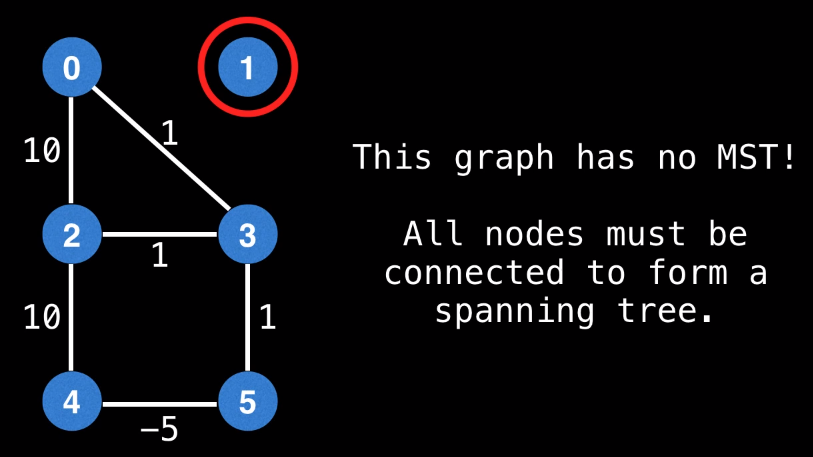

In [10]:
G = undirected_weighted_graph_list([(0, 3, 1), (0, 2, 10), (2, 3, 1), (2, 4, 10), (4, 5, -5), (5, 3, 1)])

print(prims(G))
print()
print(*get_MST(G), sep='\n')

([], [])




# Dla grafu w postaci macierzy sąsiedztwa

### Implementacja #1
##### (Dla reprezentacji macierzowej grafu)

#### Uwagi:

Wykorzystujemy koncept, który omówiłem szczegółowo w pliku z implementacją algorytmu Dijkstry. Ponieważ algorytm Prima bardzo przypomina algorytm Dijkstry (Dijkstra się na nim wzorował), implementacja również jest bardzo podobna. 
<br><br>
Ponieważ algorytmy Prima oraz Kruskala działają dobrze z ujemnymi wagami krawędzi, za krawędź nieistniejącą przyjmujemy $ \infty $.
###### UWAGA:
W poniższym algorytmie nie sprawdzam spójności grafu. Jeżeli nie wiemy, czy graf jest spójny, możemy dodać sprawdzanie spójności w taki sposób, jak wyżej.
###### UWAGA:
W przypadku tego algorytmu musimy zawsze sprawdzić, czy dany wierzchołek, który próbujemy zaktualizować, był już przetworzony, ponieważ, przeciwnie do algorytmu Dijkstry, algorytm Prima może próbować odwiedzić już przetworzone wierzchołki. Wynika to stąd, że zapisywane są wyłącznie wagi pojedynczych krawędzi, więc algorytm może się cofnąć na już przetworzony obszar grafu (w algorytmie Dijkstry nie było to możliwe, bo ścieżka do każdego nieprzetworzonego jeszcze wierzchołka miała długość/wagę zawszę większą niż ścieżka do dowolnego z przetworzonych wierzchołków). Dlatego poniżej osobno sprawdzam, czy wierzchołek był wcześniej przetworzony.

#### Złożoność:

$ O(V^2) $ - jak zawsze dla macierzowej reprezentacji, przy przeglądaniu całego grafu.

##### Kod:

In [11]:
class Node:
    def __init__(self, idx=None):
        self.idx  = idx
        self.next = None


def vertices_to_process_ll(n):
    head = Node()
    tail = head
    for i in range(n):
        tail.next = Node(i)
        tail = tail.next
    return head


def get_min_weight_vertex(head, weights, n):
    if not head.next: return None  # If no more vertices are remaining
    
    # Find a vertex of the lowest weight
    min_prev = head
    prev = head.next
    while prev.next:
        if weights[prev.next.idx] < weights[min_prev.next.idx]:
            min_prev = prev
        prev = prev.next
        
    # Remove a vertex found
    u = min_prev.next.idx
    min_prev.next = min_prev.next.next
    
    return u


def prims(G: 'graph represented by adjacency matrix'):
    n = len(G)
    inf = float('inf')
    # Store information about vertices which haven't been processed yet
    to_process = vertices_to_process_ll(n)
    parents    = [-1] * n
    weights    = [inf] * n
    processed  = [False] * n
    weights[0] = 0
    
    # Loop till there are some vertices which haven't been processed yet
    while True:
        # Find a vertex of the minimum total weight path
        u = get_min_weight_vertex(to_process, weights, n)
        # Check if a vertex was found (if not, all vertices must have
        # been processed before)        
        if u is None: break
        processed[u] = True
        # Iterate over the vertice's neighbours and update weights of the paths
        for v in range(n):
            # Skip if no edge (inf means not edge) or a vertex v was processed
            if G[u][v] == inf or processed[v]: continue
            # Update a vertice's parent if we found an edge of the lower weight
            if G[u][v] < weights[v]:
                weights[v] = G[u][v]
                parents[v] = u
                
    return parents, weights


def get_MST(G: 'graph represented by adjacency matrix') -> 'minimum spanning tree graph':
    parents, weights = prims(G)
    n = len(G)
    G = [[float('inf')] * n for _ in range(n)]  # inf means no edge
    for u in range(n):
        if parents[u] >= 0:
            G[parents[u]][u] = weights[u]
            G[u][parents[u]] = weights[u]
    return G

###### Kilka testów

##### Pomocnicze:

In [12]:
def undirected_weighted_graph_matrix(E: 'array of edges'):
    # Find a number of vertices
    n = 0
    for e in E:
        n = max(n, e[0], e[1])
    n += 1
    # Create a graph
    G = [[float('inf')] * n for _ in range(n)]
    for e in E:
        G[e[0]][e[1]] = e[2]
        G[e[1]][e[0]] = e[2]
    return G

##### Testy:

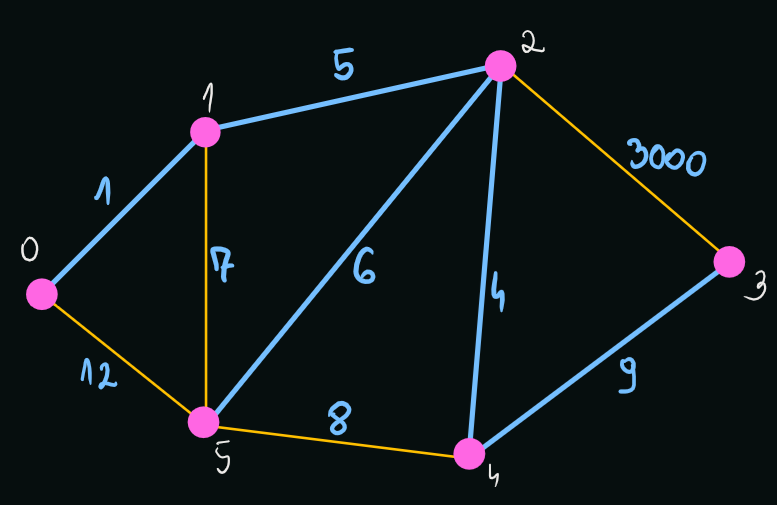

In [13]:
G = undirected_weighted_graph_matrix([(0, 1, 1), (1, 2, 5), (2, 3, 3000), (0, 5, 12), (1, 5, 7),
                                    (5, 2, 6), (5, 4, 8), (4, 2, 4), (4, 3, 9)])

print(prims(G))
print()
print(*get_MST(G), sep='\n')

([-1, 0, 1, 4, 2, 2], [0, 1, 5, 9, 4, 6])

[inf, 1, inf, inf, inf, inf]
[1, inf, 5, inf, inf, inf]
[inf, 5, inf, inf, 4, 6]
[inf, inf, inf, inf, 9, inf]
[inf, inf, 4, 9, inf, inf]
[inf, inf, 6, inf, inf, inf]


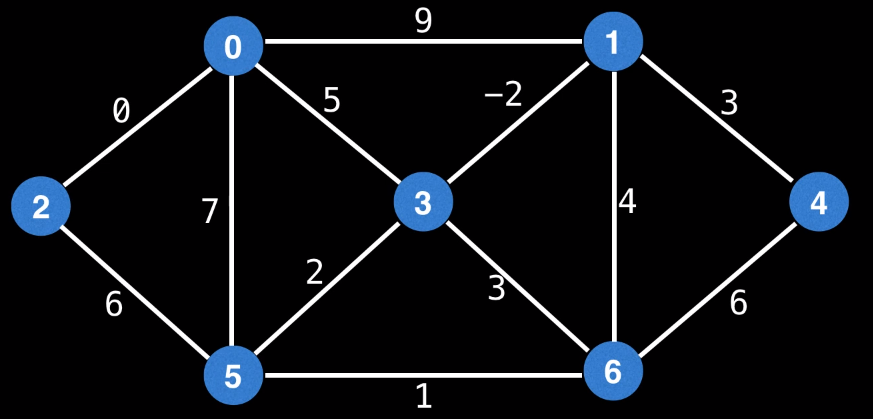
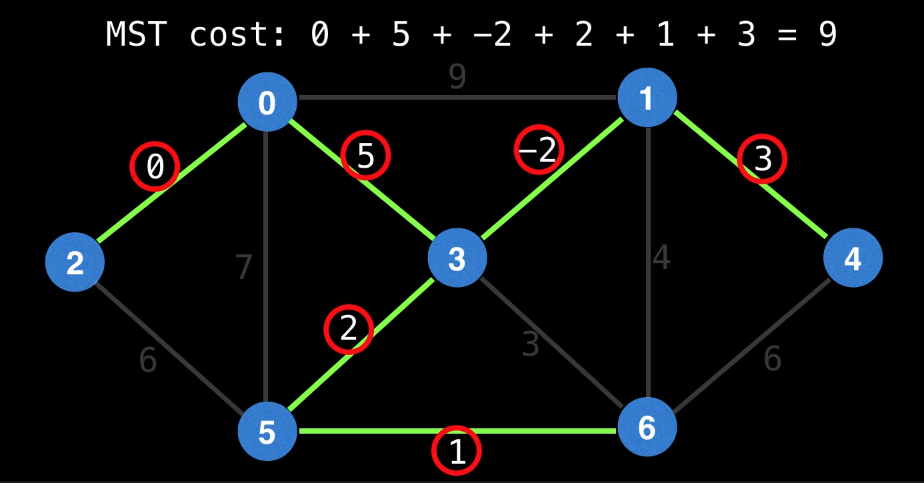

In [14]:
G = undirected_weighted_graph_matrix([(0, 1, 9), (1, 4, 3), (4, 6, 6), (6, 5, 1), (5, 2, 6), (2, 0, 0),
                                    (0, 5, 7), (0, 3, 5), (3, 5, 2), (3, 1, -2), (3, 6, 3)])

print(prims(G))
print()
print(*get_MST(G), sep='\n')

([-1, 3, 0, 0, 1, 3, 5], [0, -2, 0, 5, 3, 2, 1])

[inf, inf, 0, 5, inf, inf, inf]
[inf, inf, inf, -2, 3, inf, inf]
[0, inf, inf, inf, inf, inf, inf]
[5, -2, inf, inf, inf, 2, inf]
[inf, 3, inf, inf, inf, inf, inf]
[inf, inf, inf, 2, inf, inf, 1]
[inf, inf, inf, inf, inf, 1, inf]


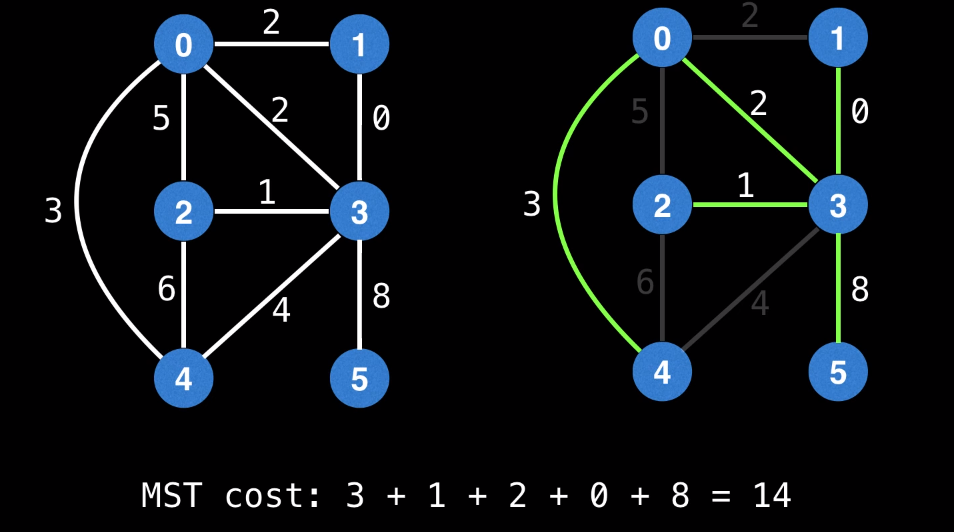

In [15]:
G = undirected_weighted_graph_matrix([(0, 1, 2), (1, 3, 0), (0, 3, 2), (0, 4, 3), (0, 2, 5), (2, 3, 1),
                                    (2, 4, 6), (4, 3, 4), (3, 5, 8)])

print(prims(G))
print()
print(*get_MST(G), sep='\n')  # Ten przykład pokazuje, że możliwe jest inne rozwiązanie niż na ilustracji

([-1, 0, 3, 1, 0, 3], [0, 2, 1, 0, 3, 8])

[inf, 2, inf, inf, 3, inf]
[2, inf, inf, 0, inf, inf]
[inf, inf, inf, 1, inf, inf]
[inf, 0, 1, inf, inf, 8]
[3, inf, inf, inf, inf, inf]
[inf, inf, inf, 8, inf, inf]


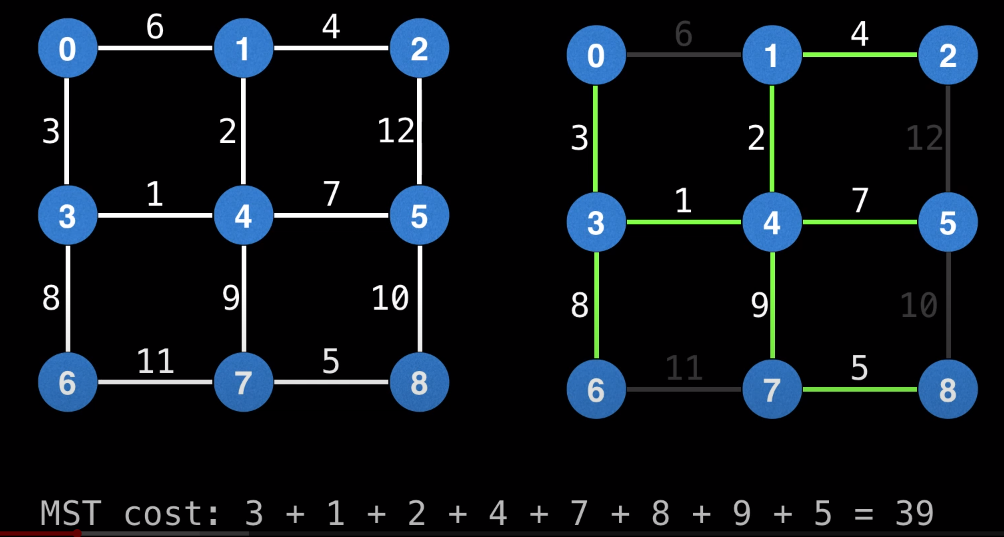

In [16]:
G = undirected_weighted_graph_matrix([(0, 1, 6), (1, 2, 4), (3, 4, 1), (4, 5, 7), (6, 7, 11), (7, 8, 5),
                                    (0, 3, 3), (3, 6, 8), (1, 4, 2), (4, 7, 9), (2, 5, 12), (5, 8, 10)])

print(prims(G))
print()
print(*get_MST(G), sep='\n')  # Ten przykład pokazuje, że możliwe jest inne rozwiązanie niż na ilustracji

([-1, 4, 1, 0, 3, 4, 3, 4, 7], [0, 2, 4, 3, 1, 7, 8, 9, 5])

[inf, inf, inf, 3, inf, inf, inf, inf, inf]
[inf, inf, 4, inf, 2, inf, inf, inf, inf]
[inf, 4, inf, inf, inf, inf, inf, inf, inf]
[3, inf, inf, inf, 1, inf, 8, inf, inf]
[inf, 2, inf, 1, inf, 7, inf, 9, inf]
[inf, inf, inf, inf, 7, inf, inf, inf, inf]
[inf, inf, inf, 8, inf, inf, inf, inf, inf]
[inf, inf, inf, inf, 9, inf, inf, inf, 5]
[inf, inf, inf, inf, inf, inf, inf, 5, inf]
